In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from random import random as rand

## useful functions, just for research

In [27]:
def hist(y, bins=50):
    y = np.array(y)
    x = y[~np.isnan(y)]
    
    for q in np.arange(0, 10, 1):
        print(f"{q / 10}: {round(np.quantile(x, q / 10), 3)}")
    
    plt.figure(figsize=(5, 3))
    
    plt.hist(x, bins=bins)

# Data

In [28]:
d = pd.read_csv("data/odds_api_soccer_russia_premier_league2021-10-16.csv")

In [29]:
d.head()

,Date Updated,Time,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw
0,2021-10-16T02:46:51Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sportsbet,9.00,1.30,5.00
1,2021-10-16T02:44:36Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,bovada,8.00,1.34,5.00
2,2021-10-16T02:46:54Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,onexbet,11.00,1.35,5.35
3,2021-10-16T02:45:37Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,betclic,7.85,1.35,5.00
4,2021-10-16T02:46:53Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,paddypower,8.50,1.29,5.00


## preprocessing 

In [30]:
# converting odds to probabilities

d["ph"] = 1 / d.moneyline_home
d["pa"] = 1 / d.moneyline_away
d["pd"] = 1 / d.moneyline_draw


d["du"] = pd.to_datetime(d["Date Updated"])
d["t"] = d.Time.apply(lambda x: x.split(" Moscow Time")[0])
d.drop(["Date Updated", "Time"], axis=1, inplace=True)

d.Date = pd.to_datetime(d.Date)

d = d[list(d.columns[-2:]) + list(d.columns[:-2])]

d.sort_values("du", inplace=True)

d["m"] = d.du.values.astype('<M8[m]')

In [31]:
d.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.125000,0.751880,0.217391,2021-10-16 02:40:00
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.114943,0.769231,0.204082,2021-10-16 02:41:00
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.133333,0.740741,0.210526,2021-10-16 02:41:00
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.133333,0.757576,0.212766,2021-10-16 02:41:00
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.125000,0.740741,0.208333,2021-10-16 02:42:00


In [32]:
s = d["ph"] + d["pa"] + d["pd"]

0.0: 0.001
0.1: 0.025
0.2: 0.046
0.3: 0.062
0.4: 0.071
0.5: 0.073
0.6: 0.078
0.7: 0.086
0.8: 0.093
0.9: 0.101


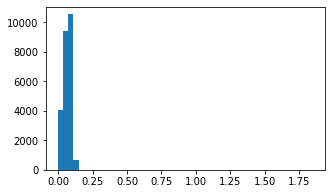

In [33]:
hist(s - 1)

In [34]:
d["ph"] /= s
d["pa"] /= s
d["pd"] /= s

In [35]:
d["ph"] += d["pd"] / 2
d["pa"] += d["pd"] / 2

In [36]:
d.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00


# EDA 

samples in minute

0.0: 1.0
0.1: 2.0
0.2: 2.0
0.3: 2.0
0.4: 3.0
0.5: 3.0
0.6: 3.0
0.7: 3.0
0.8: 4.0
0.9: 6.0


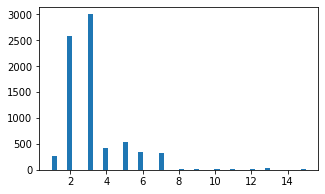

In [37]:
hist(d.groupby(["MarketName", "Bookmaker", "m"]).size())

markets

In [38]:
list(d.groupby("MarketName").groups.keys())

['Arsenal Tula/Zenit St Petersburg',
 'FK Sochi/FK Rostov',
 'Rubin Kazan/Lokomotiv Moscow',
 'Spartak Moscow/Dinamo Moscow']

bookmakers

In [39]:
np.unique(d.Bookmaker)

array(['barstool', 'betclic', 'betfair', 'betrivers', 'betus', 'bovada',
       'coral', 'draftkings', 'gtbets', 'intertops', 'ladbrokes',
       'marathonbet', 'matchbook', 'mybookieag', 'neds', 'onexbet',
       'paddypower', 'pinnacle', 'playup', 'skybet', 'sport888',
       'sportsbet', 'sugarhouse', 'tab', 'twinspires', 'unibet',
       'williamhill', 'wynnbet'], dtype=object)

# Bets for particular market, "Arsenal Tula/Zenit St Petersburg"

In [43]:
a = d[d.MarketName == "Arsenal Tula/Zenit St Petersburg"].copy()

In [44]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00


In [45]:
a["ts"] = a.du.astype(int)

In [46]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,ts
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,1634352036000000000
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,1634352075000000000
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,1634352075000000000
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,1634352077000000000
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,1634352172000000000


In [71]:
data = a[["ts", "Bookmaker", "ph", "pa"]].to_numpy()

def calculate_average_bookies(col=2):
    kbooks = {}

    res = []

    last_ts = -1
    csum = 0.0

    for i in range(len(data)):
        ts = data[i][0]
        book = data[i][1]
        v = data[i][col]

        if book in kbooks:
            csum -= kbooks[book]

        kbooks[book] = v
        csum += v
        
        res.append(csum / len(kbooks))
        
    return np.array(res)

In [72]:
mh = calculate_average_bookies(2)
ma = calculate_average_bookies(3)

a["havg"] = mh
a["aavg"] = ma

In [74]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,ts,havg,aavg
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,1634352036000000000,0.213563,0.786437
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,1634352075000000000,0.206475,0.793525
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,1634352075000000000,0.210978,0.789022
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,1634352077000000000,0.212533,0.787467
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,1634352172000000000,0.212699,0.787301


0.0: 1.0
0.1: 1.0
0.2: 1.0
0.3: 1.0
0.4: 1.0
0.5: 1.0
0.6: 1.0
0.7: 1.0
0.8: 1.0
0.9: 1.0


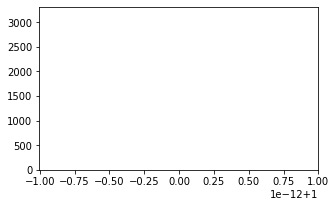

In [76]:
hist(a.havg + a.aavg)

comment: 3 different 1 hour intervals and bets from all bookmakers

special attention to pinnacle: fat blue lines

average from all bookies: red and blue lines


method of calculation average: average probs from all bookies in each minute, weight is equal

In [79]:
def time_ind(x):
    return (start_time < x.du) & (x.du < end_time)

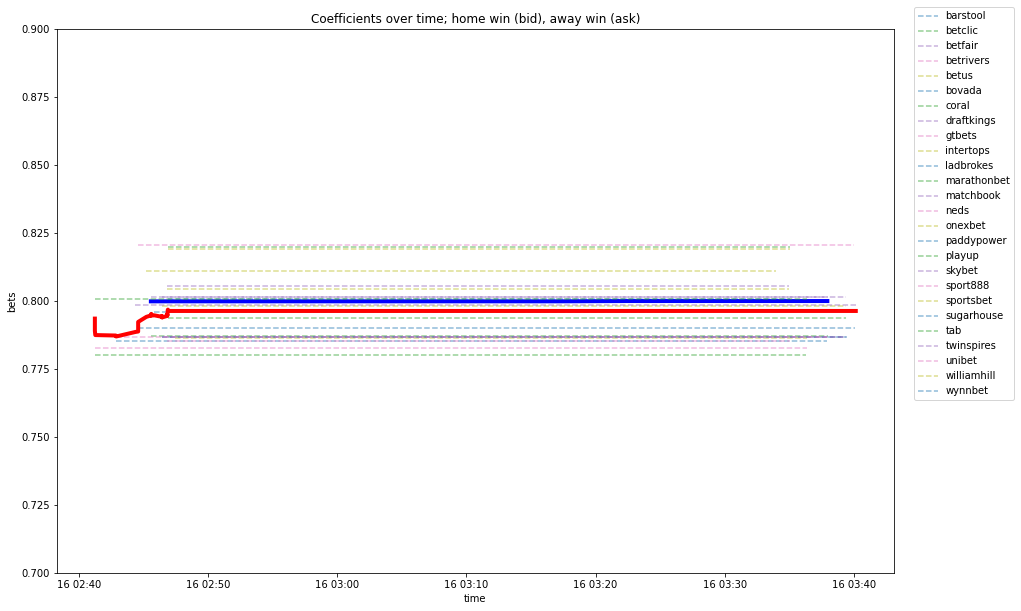

In [87]:
bookmakers = np.unique(a.Bookmaker)

for offset in [0]:
    start_time = a.iloc[0].du + pd.Timedelta(hours=offset)
    end_time = a.iloc[0].du + pd.Timedelta(hours=(offset + 1))

    plt.figure(figsize=(15, 10))

    plt.title("Coefficients over time; home win (bid), away win (ask)")
    plt.ylabel("bets")
    plt.xlabel("time")

    alpha = 0.5

    for bookmaker in bookmakers:
        c = a[a.Bookmaker == bookmaker]

        ind = time_ind(c)

        if bookmaker != "pinnacle":
            plt.plot(c.du[ind], c.pa[ind], linestyle="dashed", alpha=alpha, label=bookmaker)
            plt.plot(c.du[ind], c.ph[ind], linestyle="dashed", alpha=alpha)
        else:
            plt.plot(c.du[ind], c.pa[ind], c="b", linewidth=4)
            plt.plot(c.du[ind], c.ph[ind], c="b", linewidth=4)


    ind = time_ind(a)
    plt.plot(a.du[ind], a.aavg[ind], c="r", linewidth=4)
    plt.plot(a.du[ind], a.havg[ind], c="g", linewidth=4)

    plt.legend(bbox_to_anchor=(1.15, 1.05))
    
    plt.ylim([0.7, 0.9])

    plt.show()

bets for whole period

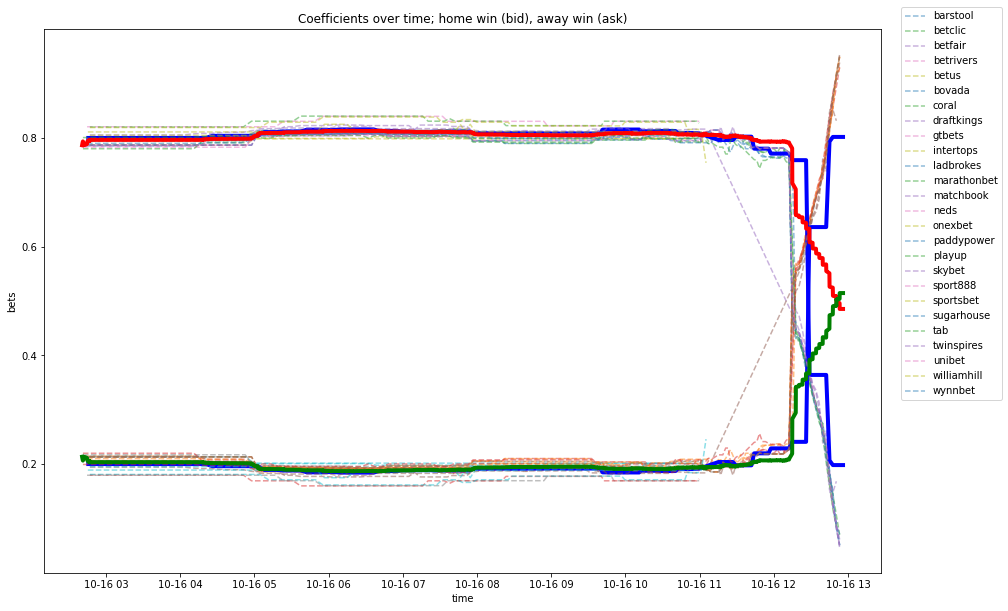

In [88]:
plt.figure(figsize=(15, 10))

plt.title("Coefficients over time; home win (bid), away win (ask)")
plt.ylabel("bets")
plt.xlabel("time")

alpha = 0.5

for bookmaker in bookmakers:
    c = a[a.Bookmaker == bookmaker]

    ind = time_ind(c)

    if bookmaker != "pinnacle":
        plt.plot(c.du, c.pa, linestyle="dashed", alpha=alpha, label=bookmaker)
        plt.plot(c.du, c.ph, linestyle="dashed", alpha=alpha)
    else:
        plt.plot(c.du, c.pa, c="b", linewidth=4)
        plt.plot(c.du, c.ph, c="b", linewidth=4)

        
plt.plot(a.du, a.aavg, c="r", linewidth=4)
plt.plot(a.du, a.havg, c="g", linewidth=4)

plt.legend(bbox_to_anchor=(1.15, 1.05))

plt.show()

In [89]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,ph,pa,pd,m,ts,havg,aavg
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,8.0,1.33,4.60,0.213563,0.786437,0.198663,2021-10-16 02:40:00,1634352036000000000,0.213563,0.786437
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,8.7,1.30,4.90,0.199387,0.800613,0.187531,2021-10-16 02:41:00,1634352075000000000,0.206475,0.793525
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,7.5,1.35,4.75,0.219986,0.780014,0.194105,2021-10-16 02:41:00,1634352075000000000,0.210978,0.789022
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,7.5,1.32,4.70,0.217198,0.782802,0.192780,2021-10-16 02:41:00,1634352077000000000,0.212533,0.787467
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,8.0,1.35,4.80,0.213362,0.786638,0.193966,2021-10-16 02:42:00,1634352172000000000,0.212699,0.787301


In [ ]:
a.to_csv("")